<a href="https://colab.research.google.com/github/Diego-1099/Colabfiles/blob/main/Practica_19__Ejercicios_con_EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------------------------
Vista Previa del Dataset:
   age  year  nodes status
0   30    64      1      1
1   30    62      3      1
2   30    65      0      1
3   31    59      2      1
4   31    65      4      1
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Información general del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   age     306 non-null    int64   
 1   year    306 non-null    int64   
 2   nodes   306 non-null    int64   
 3   status  306 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.7 KB
None
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Descripción estadística del Dat

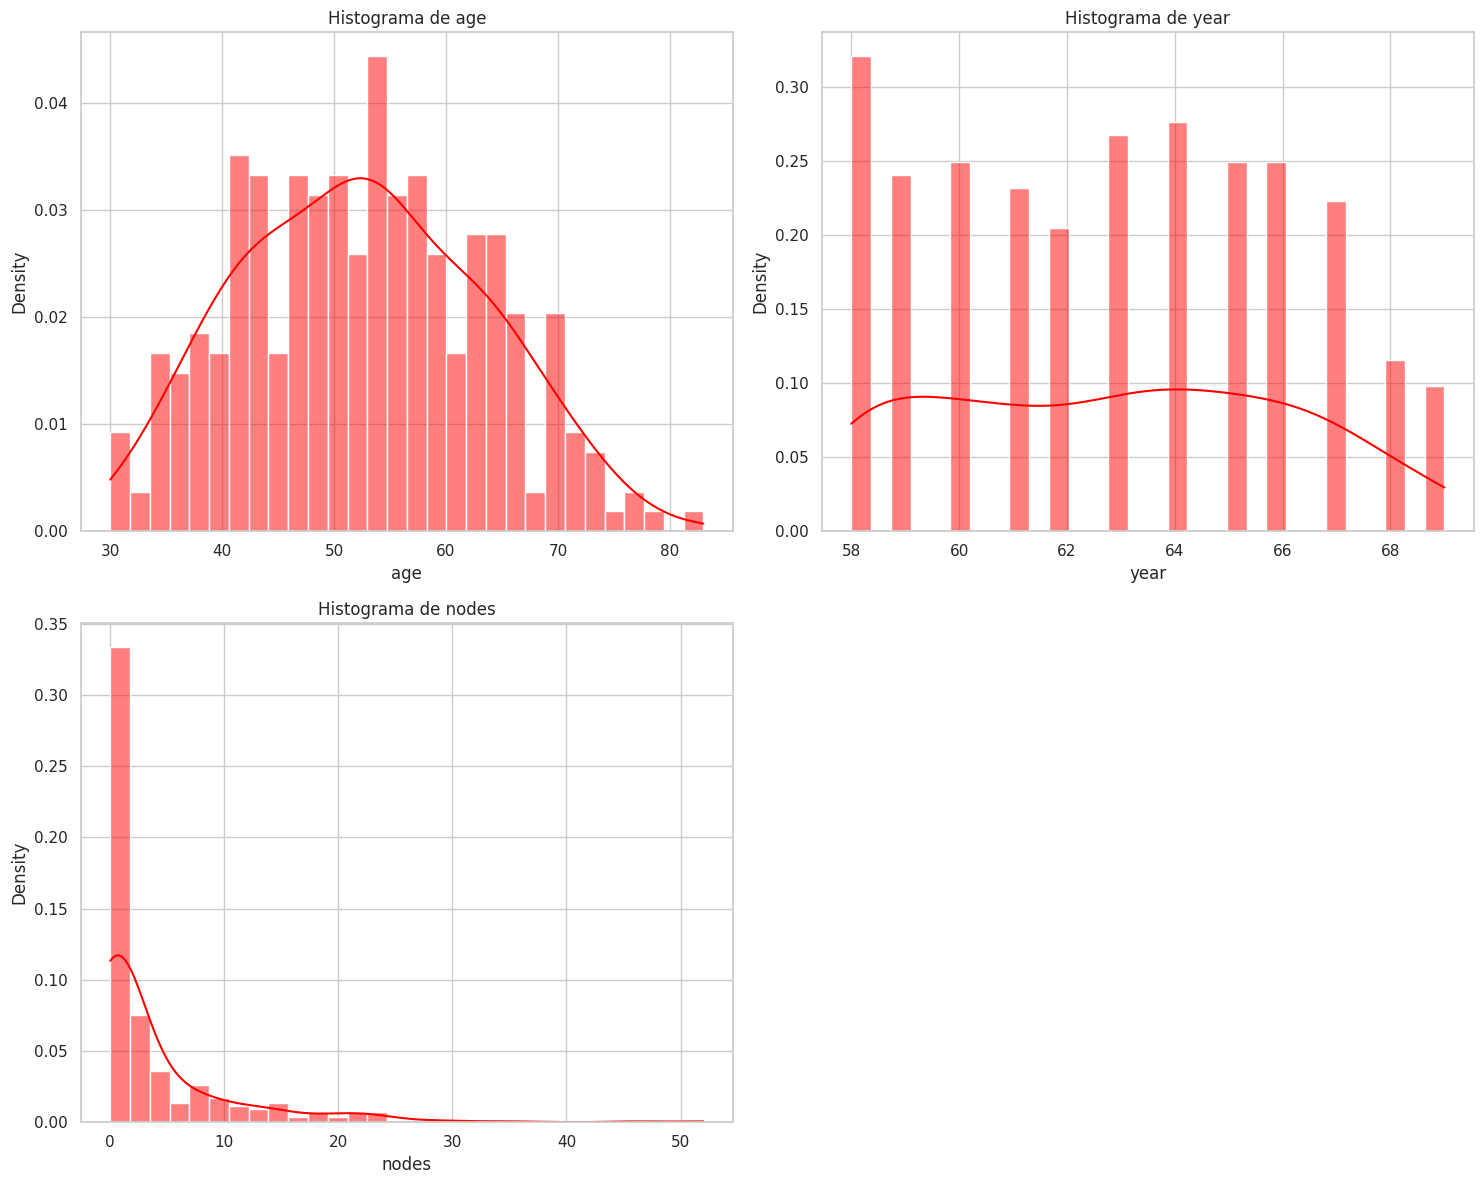

-----------------------------------------------------------------------
-----------------------------------------------------------------------




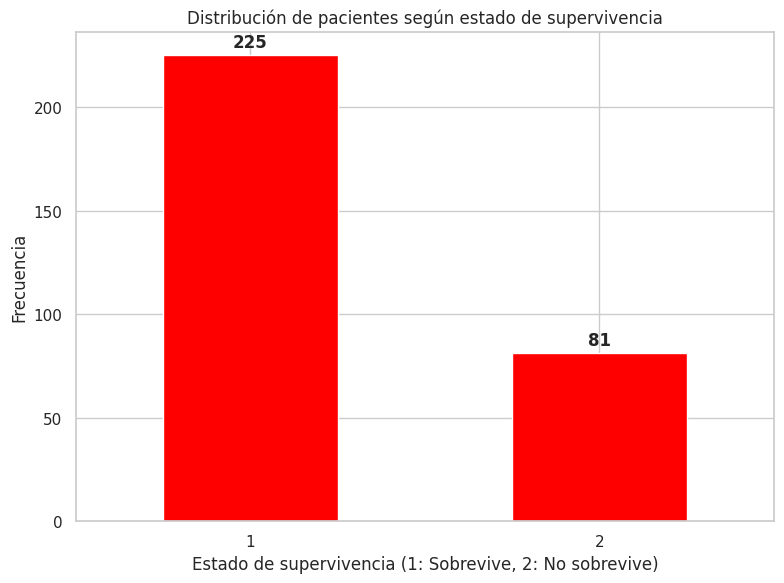

-----------------------------------------------------------------------
-----------------------------------------------------------------------




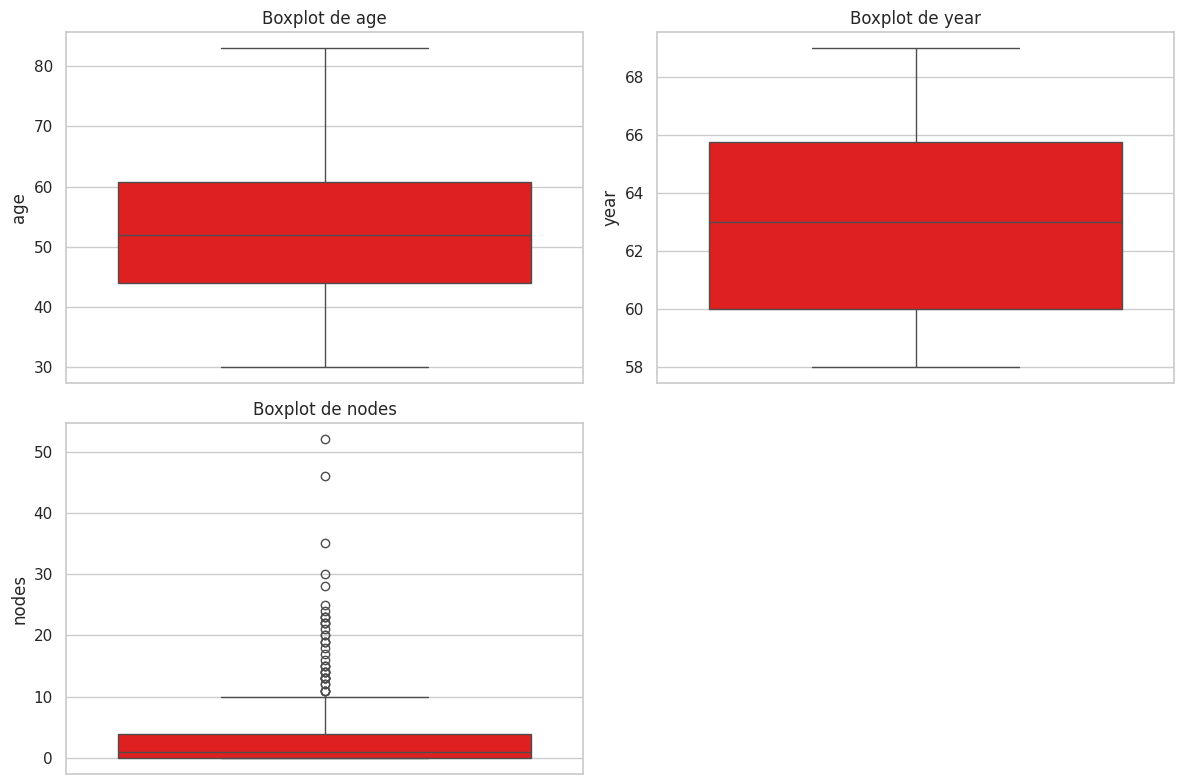

-----------------------------------------------------------------------
-----------------------------------------------------------------------




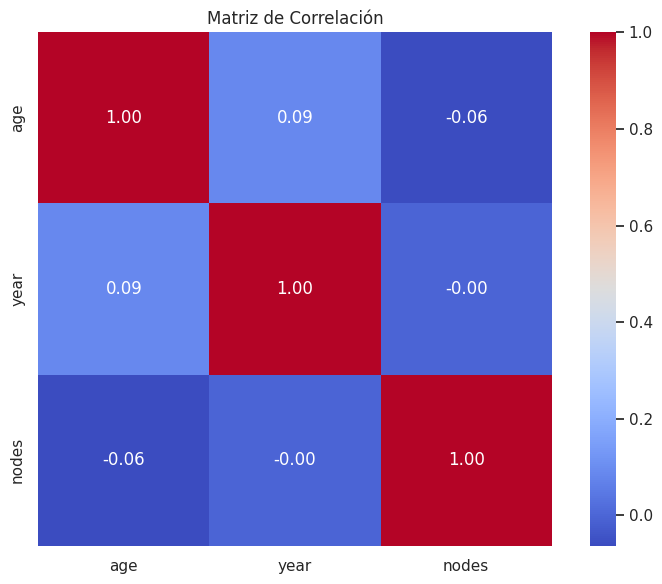

-----------------------------------------------------------------------


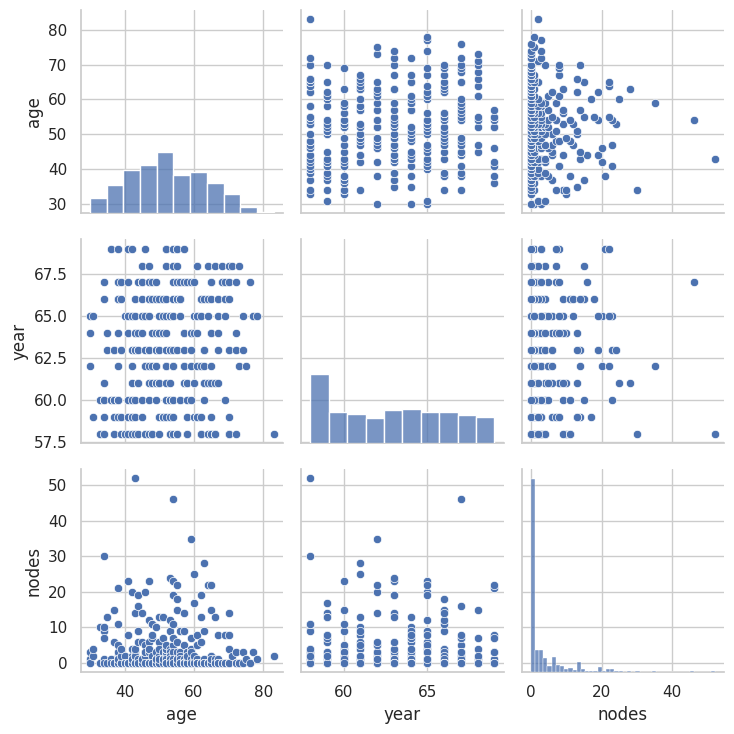


Pruebas de normalidad para age:
Shapiro-Wilk: Estadístico = 0.9895, p-valor = 0.0260
Anderson-Darling: Estadístico = 0.7316
Nivel de significancia = 15.0: valor crítico = 0.5690
Nivel de significancia = 10.0: valor crítico = 0.6480
Nivel de significancia = 5.0: valor crítico = 0.7770
Nivel de significancia = 2.5: valor crítico = 0.9060
Nivel de significancia = 1.0: valor crítico = 1.0780
Kolmogorov-Smirnov: Estadístico = 0.0479, p-valor = 0.4698


<Figure size 600x400 with 0 Axes>

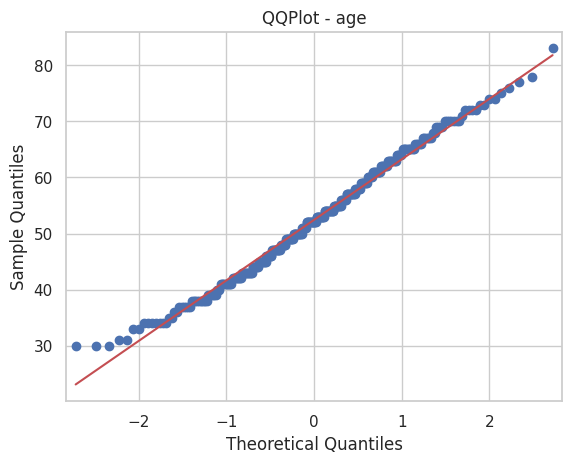


Pruebas de normalidad para year:
Shapiro-Wilk: Estadístico = 0.9468, p-valor = 0.0000
Anderson-Darling: Estadístico = 4.3137
Nivel de significancia = 15.0: valor crítico = 0.5690
Nivel de significancia = 10.0: valor crítico = 0.6480
Nivel de significancia = 5.0: valor crítico = 0.7770
Nivel de significancia = 2.5: valor crítico = 0.9060
Nivel de significancia = 1.0: valor crítico = 1.0780
Kolmogorov-Smirnov: Estadístico = 0.1074, p-valor = 0.0016


<Figure size 600x400 with 0 Axes>

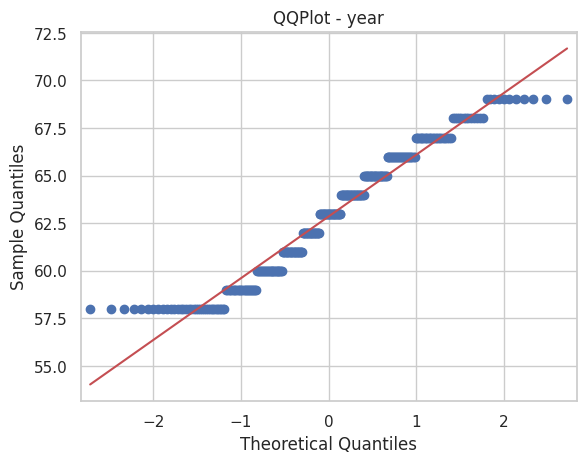


Pruebas de normalidad para nodes:
Shapiro-Wilk: Estadístico = 0.6153, p-valor = 0.0000
Anderson-Darling: Estadístico = 39.6866
Nivel de significancia = 15.0: valor crítico = 0.5690
Nivel de significancia = 10.0: valor crítico = 0.6480
Nivel de significancia = 5.0: valor crítico = 0.7770
Nivel de significancia = 2.5: valor crítico = 0.9060
Nivel de significancia = 1.0: valor crítico = 1.0780
Kolmogorov-Smirnov: Estadístico = 0.2877, p-valor = 0.0000


<Figure size 600x400 with 0 Axes>

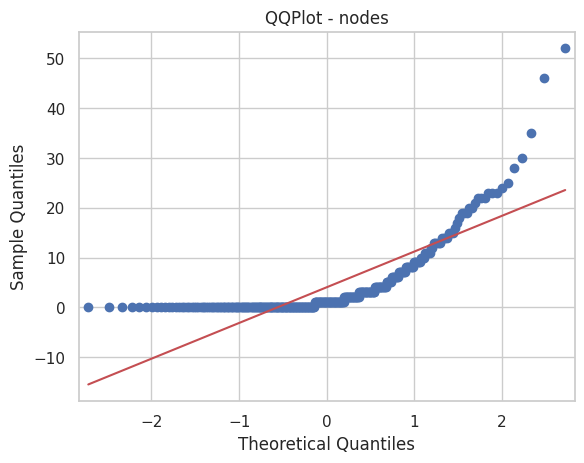

In [10]:
# ==============================================================================
#                          IMPORTACIÓN DE LIBRERÍAS
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
#                               CARGA DE DATOS
# ==============================================================================

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
column_names = ['age', 'year', 'nodes', 'status']
data = pd.read_csv(url, header=None, names=column_names)

data['status'] = data['status'].astype('category')
status_counts = data['status'].value_counts()

print('-----------------------------------------------------------------------')

print('Vista Previa del Dataset:')
print(data.head())

print('-----------------------------------------------------------------------')
# ==============================================================================
#                           DESCRIPCIÓN DE LOS DATOS
# ==============================================================================

print('-----------------------------------------------------------------------')

print('Información general del Dataset:')
print(data.info())

print('-----------------------------------------------------------------------')

print('-----------------------------------------------------------------------')

print('Descripción estadística del Dataset:')
print(data.describe())

print('-----------------------------------------------------------------------')

# ==============================================================================
#             VISUALIZACIÓN: HISTOGRAMAS PARA COLUMNAS NUMÉRICAS
# ==============================================================================

print('-----------------------------------------------------------------------')

print('\nHistogramas para columnas numéricas: \n')

columnas_numericas = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 12))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30, color='red', stat='density')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)

print('\n')
plt.tight_layout()
plt.show()

print('-----------------------------------------------------------------------')

# ==============================================================================
#             VISUALIZACIÓN: GRÁFICAS DE BARRAS PARA LA COLUMNA CATEGÓRICA
# ==============================================================================


plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color='red')


for i, v in enumerate(status_counts):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')


plt.title('Distribución de pacientes según estado de supervivencia')
plt.xlabel('Estado de supervivencia (1: Sobrevive, 2: No sobrevive)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
print('-----------------------------------------------------------------------')

print('\n')
plt.tight_layout()
plt.show()

print('-----------------------------------------------------------------------')

# ==============================================================================
#             VISUALIZACIÓN: BOXPLOTS PARA COLUMNAS NUMÉRICAS
# ==============================================================================

plt.figure(figsize=(12, 8))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=data[col], color='red')
    plt.title(f'Boxplot de {col}')

print('-----------------------------------------------------------------------')

print('\n')
plt.tight_layout()
plt.show()

print('-----------------------------------------------------------------------')

# ==============================================================================
#             VISUALIZACIÓN: MATRIZ DE CORRELACIÓN Y MAPA DE CALOR
# ==============================================================================

matriz_correlacion = data[columnas_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Matriz de Correlación')

print('-----------------------------------------------------------------------')

print('\n')
plt.tight_layout()
plt.show()

print('-----------------------------------------------------------------------')
# ==============================================================================
#             VISUALIZACIÓN: PAIRPLOT RELACIONES ENTRE VARIABLES NUMÉRICAS
# ==============================================================================

sns.pairplot(data[columnas_numericas])
plt.tight_layout()
plt.show()

# ==============================================================================
#      VISUALIZACIÓN: PRUEBAS DE NORMALIDAD Y QQPLOT PARA COLUMNAS NUMÉRICAS
# ==============================================================================

for col in columnas_numericas:
    print(f'\nPruebas de normalidad para {col}:')

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(data[col].dropna())
    print(f'Shapiro-Wilk: Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}')

    # Anderson-Darling Test
    anderson_result = stats.anderson(data[col].dropna())
    print(f'Anderson-Darling: Estadístico = {anderson_result.statistic:.4f}')
    for i in range(len(anderson_result.critical_values)):
        sl, cv = anderson_result.significance_level[i], anderson_result.critical_values[i]
        print(f'Nivel de significancia = {sl:.1f}: valor crítico = {cv:.4f}')

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = stats.kstest(data[col].dropna(), 'norm', args=(data[col].mean(), data[col].std()))
    print(f'Kolmogorov-Smirnov: Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}')

    # QQPlot
    plt.figure(figsize=(6, 4))
    qqplot(data[col].dropna(), line='s')
    plt.title(f'QQPlot - {col}')
    plt.show()

